## Hierarchial Clustering on Airline Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering


%matplotlib inline

In [2]:
airline_data=pd.read_excel("C:/Users/samee/OneDrive/Documents/ExcelR/Assignment-07/EastWestAirlines.xlsx",sheet_name='data')

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [4]:
airline_data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
airline_data.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [6]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
airline_data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

<AxesSubplot:>

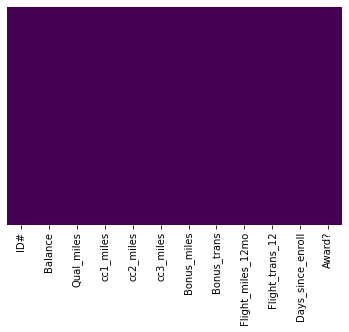

In [8]:
sns.heatmap(airline_data.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [9]:
airline_data[airline_data.duplicated()].shape

(0, 12)

In [10]:
airline_data.drop_duplicates()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [11]:
airline_data2=airline_data.drop(columns='ID#',axis=1)

In [12]:
airline_data2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [13]:
airline_data2[airline_data2.duplicated()].shape
airline_data2.shape

(1, 11)

(3999, 11)

In [14]:
airline_data3=airline_data2.drop_duplicates()
airline_data3.shape

(3998, 11)

In [15]:
## Normalization

airline_norm=pd.DataFrame(normalize(airline_data3),columns=airline_data3.columns)
airline_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3993,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3994,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3995,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3996,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


<Figure size 720x504 with 0 Axes>

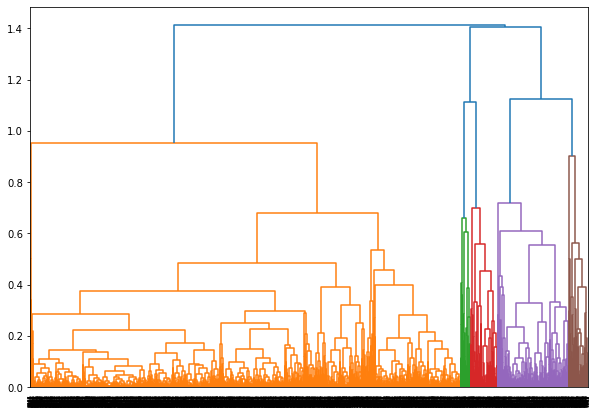

In [16]:
## Create Dendrograms

## Complete-linkage: calculates the maximum distance between clusters before merging.
## Single-linkage: calculates the minimum distance between the clusters before merging. 
## Average-linkage: calculates the average distance between clusters before merging.
## Centroid-linkage: finds centroid of cluster 1 and centroid of cluster 2, 
##and then calculates the distance between the two before merging.


plt.figure(figsize=(10,7))
dendograms=sch.dendrogram(sch.linkage(airline_norm,'complete'))

In [17]:
## Create Clusters (y)

hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [18]:
y=pd.DataFrame(hclusters.fit_predict(airline_norm),columns=['ClusterID'])
y['ClusterID'].value_counts()

2    1547
4    1191
3     579
1     453
0     228
Name: ClusterID, dtype: int64

In [19]:
hclusters.labels_

array([4, 2, 2, ..., 2, 4, 2], dtype=int64)

In [20]:
## Adding Clusters to DataSet

airline_data3["ClusterID"]=hclusters.labels_
airline_data3.head()

C:\Users\samee\AppData\Local\Temp/ipykernel_20892/3202509023.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_data3["ClusterID"]=hclusters.labels_


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,ClusterID
0,28143,0,1,1,1,174,1,0,0,7000,0,4
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3


In [21]:
airline_data3.groupby('ClusterID').agg(['mean']).reset_index()

,ClusterID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,5544.065789,8.793860,1.000000,1.000000,1.000000,587.096491,2.412281,67.276316,0.210526,4889.679825,0.131579
1,1,31066.514349,111.415011,3.200883,1.026490,1.070640,40266.935982,17.289183,626.754967,1.812362,4205.624724,0.858720
2,2,81201.080802,136.521008,2.115061,1.013575,1.000646,16350.149968,13.574014,488.550743,1.340659,4285.891403,0.312217
3,3,69569.894646,97.257340,3.326425,1.032815,1.022453,35743.675302,17.784111,406.804836,1.274611,4090.832470,0.525043
4,4,94957.590260,215.220823,1.141058,1.005038,1.002519,3524.928631,5.640638,461.104954,1.521411,3736.071369,0.230898


<Figure size 720x504 with 0 Axes>

Text(0.5, 1.0, 'Clusters of Airline Data')

Text(0.5, 0, 'ClusterID')

Text(0, 0.5, 'Balance')

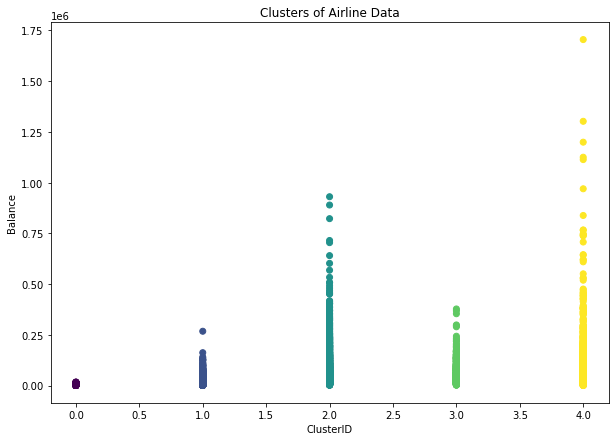

In [22]:
## Plot Clusters

plt.figure(figsize=(10,7))
plt.scatter(airline_data3['ClusterID'],airline_data3['Balance'],c=hclusters.labels_)
plt.title('Clusters of Airline Data')
plt.xlabel('ClusterID')
plt.ylabel('Balance')

In [23]:
## So using 5 clusters, we get this Output

## In this way, Heirarchial Clustering done on Airline Data

## K-Means Clustering on Airline data

In [24]:
from sklearn.cluster import KMeans

In [25]:
air_data=pd.read_excel("C:/Users/samee/OneDrive/Documents/ExcelR/Assignment-07/EastWestAirlines.xlsx",sheet_name='data')

In [26]:
air_data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [27]:
air_data.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [28]:
air_data1=air_data.drop(columns='ID#',axis=1)
air_data1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [29]:
air_data1[air_data1.duplicated()].shape
air_data1.shape

(1, 11)

(3999, 11)

In [30]:
air_data2=air_data1.drop_duplicates()
air_data2.shape

(3998, 11)

In [31]:
air_data2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [32]:
## Normalization

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_air_data=scaler.fit_transform(air_data2.iloc[:,:])
scaled_air_data

array([[-4.51293870e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.39523468e+00, -7.67071631e-01],
       [-5.39604653e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.37973643e+00, -7.67071631e-01],
       [-3.20192202e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.41170157e+00, -7.67071631e-01],
       ...,
       [-2.23153612e-04, -1.86322793e-01,  6.82893866e-01, ...,
        -3.62219103e-01, -1.31599028e+00,  1.30365921e+00],
       [-1.85776026e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -9.85832074e-02, -1.31647460e+00, -7.67071631e-01],
       [-7.00646048e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01, -1.31792757e+00, -7.67071631e-01]])

In [33]:
from sklearn.cluster import KMeans

In [34]:
wcss=[]

for i in range(1,8):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(scaled_air_data)
    wcss.append(kmeans.inertia_)

KMeans(n_clusters=1, random_state=42)

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=6, random_state=42)

KMeans(n_clusters=7, random_state=42)

In [35]:
wcss

[43978.00000000003,
 35402.34837621176,
 30893.08320079449,
 27157.004578832817,
 23702.799558386894,
 21086.128993938626,
 19878.798871970524]

In [36]:
kmeans.inertia_

19878.798871970524

In [37]:
## For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ).
## WCSS is the sum of squared distance between each point and the centroid in a cluster. 

## Inertia measures how well a dataset was clustered by K-Means.

In [38]:
wcss=[]

for i in range(1,6):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(scaled_air_data)
    wcss.append(kmeans.inertia_)
    


KMeans(n_clusters=1, random_state=0)

KMeans(n_clusters=2, random_state=0)

KMeans(n_clusters=3, random_state=0)

KMeans(n_clusters=4, random_state=0)

KMeans(n_clusters=5, random_state=0)

<Figure size 1080x504 with 0 Axes>

Text(0.5, 1.0, 'Elbow Method')

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'WCSS')

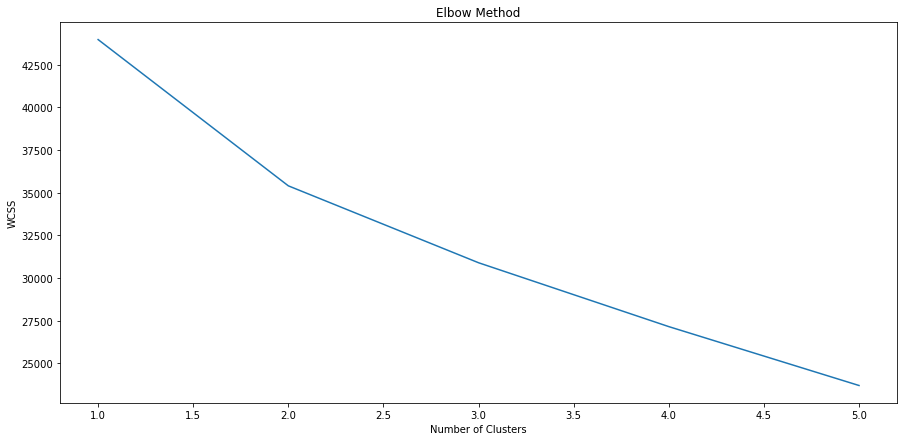

In [39]:
## Plotting a Elbow Graph

plt.figure(figsize=(15,7))
plt.plot(range(1,6),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [40]:
## Checking where elbow id breaking

clusters_new=KMeans(2,random_state=42)
clusters_new.fit(scaled_air_data)

KMeans(n_clusters=2, random_state=42)

In [41]:
clusters_new.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [42]:
clusters_new.cluster_centers_

array([[ 0.58694552,  0.14664101,  1.12603941, -0.03068253,  0.12590582,
         1.00471058,  0.91371623,  0.36223857,  0.40319501,  0.39741929,
         0.69976227],
       [-0.28378108, -0.07089916, -0.54442648,  0.01483463, -0.06087395,
        -0.48576545, -0.44177078, -0.17513798, -0.19493993, -0.19214743,
        -0.33832662]])

In [43]:
## Assign Clusters to DataSet

air_data2['Clusters']=clusters_new.labels_

C:\Users\samee\AppData\Local\Temp/ipykernel_20892/1786660109.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_data2['Clusters']=clusters_new.labels_


In [44]:
air_data2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [45]:
air_data2.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,132760.658986,257.798771,3.610599,1.009985,1.036866,41429.117512,20.380952,967.233487,2.902458,4942.417819,0.708909
1,1,45057.986276,89.265579,1.310831,1.016691,1.000371,5423.415801,7.366469,215.291172,0.635757,3721.622404,0.206973


In [46]:
## From KMeans , we can see that Elbow was breaking at 2
## so number of Clusters is taken as 2 and further computations are done

## DBScan Clustering For Airline Data

In [47]:
import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN

In [48]:
air1=pd.read_excel("C:/Users/samee/OneDrive/Documents/ExcelR/Assignment-07/EastWestAirlines.xlsx",sheet_name='data')

In [49]:
air1.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [50]:
air1.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [51]:
air2=air1.drop(columns='ID#',axis=1)

In [52]:
air2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [53]:
air2[air2.duplicated()].shape
air2.shape

(1, 11)

(3999, 11)

In [54]:
air3=air2.drop_duplicates()
air3.shape

(3998, 11)

In [55]:
air3.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [56]:
air3.tail()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0
3998,3016,0,1,1,1,0,0,0,0,1398,0


In [57]:
air3.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [58]:
array=air3.values

In [59]:
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [60]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_air1=scaler.fit_transform(array)
scaled_air1

array([[-4.51293870e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.39523468e+00, -7.67071631e-01],
       [-5.39604653e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.37973643e+00, -7.67071631e-01],
       [-3.20192202e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.41170157e+00, -7.67071631e-01],
       ...,
       [-2.23153612e-04, -1.86322793e-01,  6.82893866e-01, ...,
        -3.62219103e-01, -1.31599028e+00,  1.30365921e+00],
       [-1.85776026e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -9.85832074e-02, -1.31647460e+00, -7.67071631e-01],
       [-7.00646048e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01, -1.31792757e+00, -7.67071631e-01]])

In [61]:
dbscan=DBSCAN(eps=2,min_samples=5)
dbscan.fit(scaled_air1)

DBSCAN(eps=2)

In [62]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [63]:
cl=pd.DataFrame(dbscan.labels_,columns=['Cluster'])
cl

,Cluster
0,0
1,0
2,0
3,0
4,1
...,...
3993,1
3994,1
3995,1
3996,0


In [64]:
clustered=pd.concat([air3,cl],axis=1)

In [65]:
clustered.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0,0.0
1,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0,0.0
2,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0.0,0.0
3,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0.0,0.0
4,97752.0,0.0,4.0,1.0,1.0,43300.0,26.0,2077.0,4.0,6935.0,1.0,1.0


In [66]:
clustered['Cluster'].unique()

array([ 0.,  1., -1.,  4.,  3.,  5.,  2., nan])

In [67]:
clustered['Cluster'].value_counts()

 0.0    2452
 1.0    1330
-1.0     179
 2.0      16
 3.0       9
 4.0       7
 5.0       5
Name: Cluster, dtype: int64

In [68]:
clustered.groupby('Cluster').agg(['mean']).reset_index()

,Cluster,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1.0,255909.776536,1599.491620,2.865922,1.094972,1.273743,52836.290503,26.413408,3724.340782,10.441341,4961.888268,0.770950
1,0.0,58192.922920,63.696166,1.706362,1.000408,1.000000,10006.367455,8.993067,200.935971,0.577080,3817.311582,0.009788
2,1.0,78325.624530,100.250564,2.633559,1.000000,1.000000,25707.708804,14.319789,493.783296,1.553800,4572.142212,0.983446
3,2.0,39077.125000,0.000000,1.000000,1.937500,1.000000,8916.625000,12.937500,209.375000,0.812500,3511.250000,0.000000
4,3.0,51096.000000,0.000000,1.000000,3.000000,1.000000,15561.666667,14.333333,44.444444,0.222222,3603.444444,0.000000
5,4.0,40618.000000,0.000000,1.000000,2.000000,1.000000,8444.142857,14.285714,250.000000,0.714286,4612.285714,1.000000
6,5.0,73323.400000,117.800000,1.000000,1.000000,1.000000,12311.200000,30.000000,3734.600000,24.800000,4324.800000,1.000000


In [69]:
## Therefore , using DBScan we got 7 Clusters as above